# Practice Assignment: Understanding Distributions Through Sampling

To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


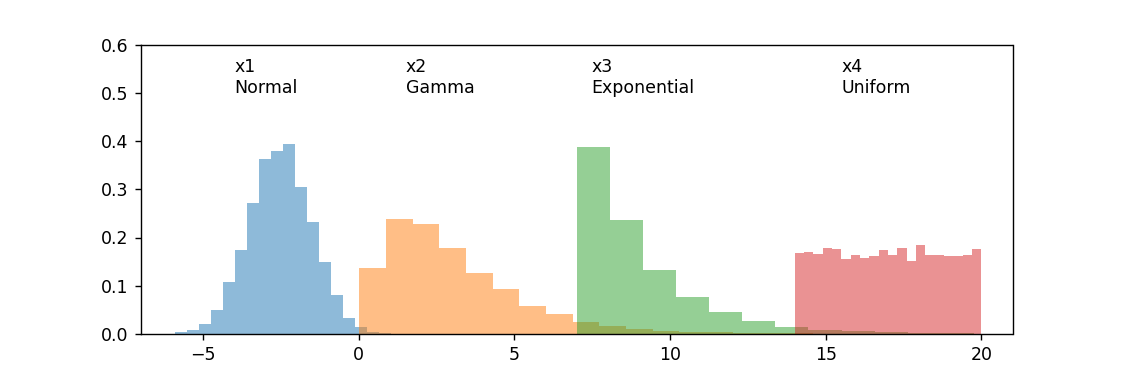

Text(15.494859528884444, 0.5, 'x4\nUniform')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000) + 7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, bins=20, alpha=0.5, density=True)
plt.hist(x2, bins=20, alpha=0.5, density=True)
plt.hist(x3, bins=20, alpha=0.5, density=True)
plt.hist(x4, bins=20, alpha=0.5, density=True);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(0, 1, 10000)
x2 = np.random.gamma(2, 1, 10000)
x3 = np.random.exponential(2, 10000)
x4 = np.random.uniform(0, x3.max(), 10000)

<IPython.core.display.Javascript object>


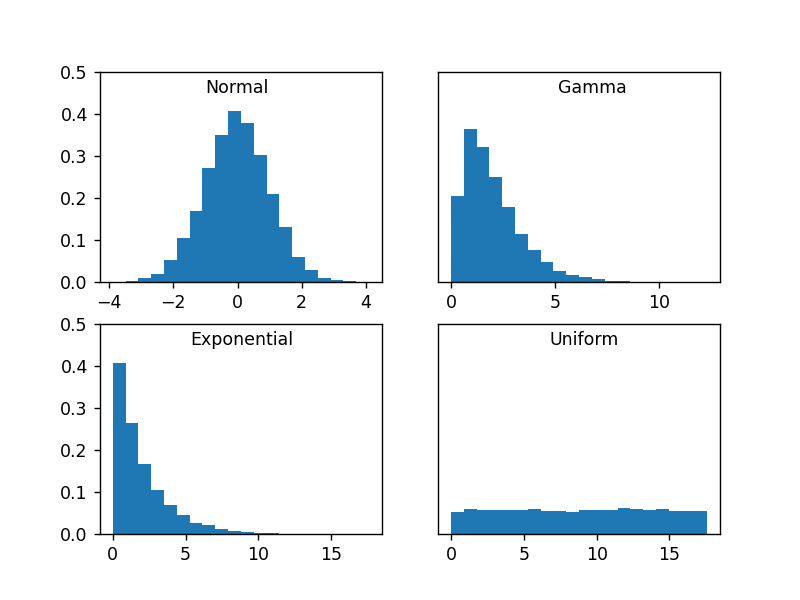

Text(6.794084073407653, 0.45, 'Uniform')

In [3]:
plt.figure()
ax1 = plt.subplot(2, 2, 1); plt.hist(x1, bins=20, density=True)
plt.ylim([0, 0.5])
ax2 = plt.subplot(2, 2, 2, sharey=ax1); plt.hist(x2, bins=20, density=True)
ax2.get_yaxis().set_visible(False)
ax3 = plt.subplot(2, 2, 3, sharey=ax1); plt.hist(x3, bins=20, density=True)
ax4 = plt.subplot(2, 2, 4, sharey=ax1); plt.hist(x4, bins=20, density=True)
ax4.get_yaxis().set_visible(False)

ax1.text(-1, 0.45, 'Normal')
ax2.text(x2.max()/2-1, 0.45, 'Gamma')
ax3.text(x3.max()/2-3.5, 0.45, 'Exponential')
ax4.text(x4.max()/2-2, 0.45, 'Uniform')

# Animation

In [4]:
import matplotlib.animation as animation

In [5]:
title_list = ["Normal", "Gamma", "Exponential", "Uniform"]
func_list = [x1, x2, x3, x4]

<IPython.core.display.Javascript object>


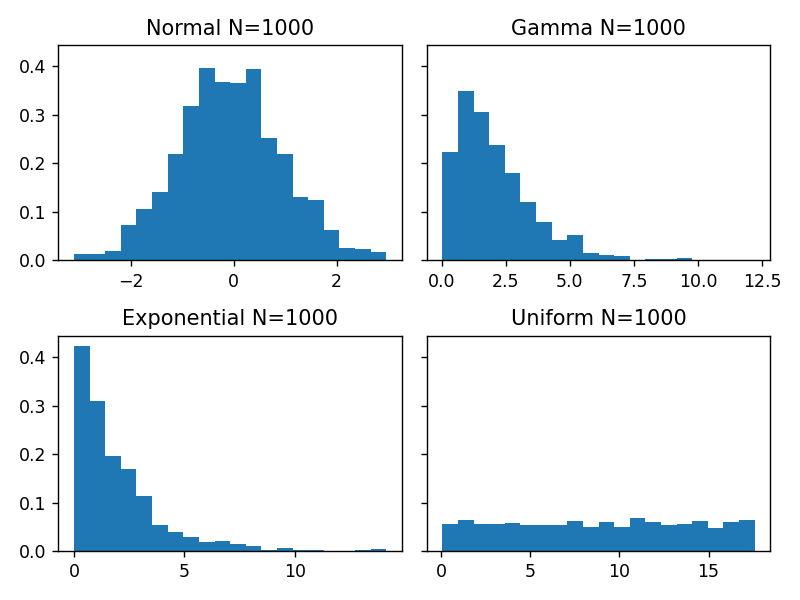

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True)
ax = [ax1, ax2, ax3, ax4]

n = 12

for i in range(len(func_list)):
    ax[i].hist(func_list[i][:100], bins=20, density=True)
    ax[i].set_title(title_list[i] + "N=100")
    
plt.tight_layout()

def update(curr):
    if curr == n:
        a.event_source.stop()
        
    for i in range(len(func_list)):
        ax[i].cla()
        ax[i].hist(func_list[i][:75*curr+100], bins=20, density=True)
        ax[i].set_title(title_list[i] + " N=" + str(75*curr+100))
        
    plt.tight_layout()
    
a = animation.FuncAnimation(fig, update, interval=10)